# **Space X  Falcon 9 First Stage Landing Prediction**


# Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


# **Objectives**


**Perform exploratory  Data Analysis and determine Training Labels**

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data 

**Find best Hyperparameter for SVM, Classification Trees and Logistic Regression**

*   Find the method performs best using test data

# **Import Libraries and Define Auxiliary Functions**

In [4]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standardize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [5]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# **Load the DataFrame**


In [6]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

print(data.shape)
data.head()

(90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
print(X.shape)

X.head()

(90, 83)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\[" Column Name "]).


In [8]:
Y = data['Class'].to_numpy()   # Results Of Landing stored in Y
print(Y.shape)
Y                             

(90,)


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# **Data Preprocessing**

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# Standardize features by removing the mean and scaling to unit variance
transform = preprocessing.StandardScaler()

In [10]:
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


# **Train Test Split**


Use the function train_test_split to split the data X and Y into training and test data. <br>
Set the parameter test_size to  0.2 and random_state to 2. <br>
Random state is a model hyperparameter used to control the randomness involved in model


<code>X_train, X_test, Y_train, Y_test</code>


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (67, 83) (67,)
Test set: (23, 83) (23,)


we can see we only have 18 test samples.


In [122]:
Y_test.shape    # 25% of Original DataSet is used for testing predicted values 
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1])

# **Logistic Regression**


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [123]:
parameters = { 'C':[0.01,0.1,1],  'penalty':['l2'], 'solver':['lbfgs'] }

## Training the Logistic Regression Model

In [124]:
# If Hyperparameters Not Required , we can use this :
# lr=LogisticRegression()
# lr.fit(X_train,Y_train)

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}  # l1 lasso l2 ridge
lr=LogisticRegression()
lr_clf = GridSearchCV(lr,parameters,cv=10)   # cv means Cross-Validation 
lr_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [125]:
GridSearchCV_Result=pd.DataFrame(lr_clf.cv_results_)
GridSearchCV_Result[["param_C","param_penalty","mean_test_score"]]

,param_C,param_penalty,mean_test_score
0,0.01,l2,0.804762
1,0.1,l2,0.821429
2,1,l2,0.823810


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [126]:
print("tuned hpyerparameters :(best parameters) ",lr_clf.best_params_)
print("accuracy :",lr_clf.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8238095238095238


## Testing the Logistic Regression Model

Calculate the accuracy on the test data using the method <code>score</code>:


In [127]:
Logistic_Regression_Accuracy=lr_clf.score(X_test, Y_test)
print("test set accuracy :",Logistic_Regression_Accuracy)


test set accuracy : 0.8260869565217391


## Confusion Matrix


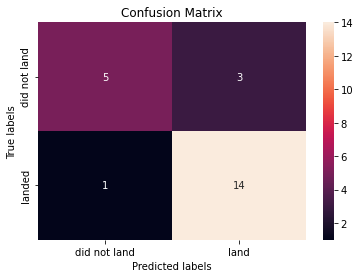

In [128]:
yhat=lr_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


# **Support Vector Machine**


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [129]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
              
svm = SVC()   # Creating instance Of SVM model

## Training the SVM Model

In [130]:
svm_clf = GridSearchCV(svm,parameters,cv=10)
svm_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [131]:
GridSearchCV_Result=pd.DataFrame(svm_clf.cv_results_)
GridSearchCV_Result.head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000911,0.000260,0.000520,0.000182,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38
1,0.000517,0.000033,0.000267,0.000015,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38
2,0.000525,0.000097,0.000249,0.000027,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.571429,0.571429,...,0.714286,0.714286,0.714286,0.714286,0.666667,0.666667,0.666667,0.671429,0.054085,38


In [132]:
print(GridSearchCV_Result[["param_kernel","param_C","param_gamma","mean_test_score"]] )

    param_kernel param_C param_gamma  mean_test_score
0         linear   0.001       0.001         0.671429
1            rbf   0.001       0.001         0.671429
2           poly   0.001       0.001         0.671429
3            rbf   0.001       0.001         0.671429
4        sigmoid   0.001       0.001         0.671429
..           ...     ...         ...              ...
120       linear  1000.0      1000.0         0.750000
121          rbf  1000.0      1000.0         0.671429
122         poly  1000.0      1000.0         0.657143
123          rbf  1000.0      1000.0         0.671429
124      sigmoid  1000.0      1000.0         0.728571

[125 rows x 4 columns]


In [133]:
print("tuned hyperparameters :(best parameters) ",svm_clf.best_params_)
print("accuracy :",svm_clf.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.838095238095238


## Testing the SVM Model

Calculate the accuracy on the test data using the method <code>score</code>:


In [134]:
SVM_Accuracy=svm_clf.score(X_test, Y_test)
print("test set accuracy :",SVM_Accuracy)

test set accuracy : 0.8260869565217391


## Confusion Matrix


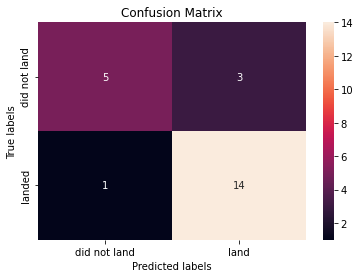

In [135]:
yhat=svm_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **Decision Tree**


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [136]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

## Training the Decision Tree Model

In [137]:
dt_clf = GridSearchCV(tree,parameters,cv=10)
dt_clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [138]:
GridSearchCV_Result=pd.DataFrame(dt_clf.cv_results_)
GridSearchCV_Result.columns
GridSearchCV_Result[['param_criterion', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split', 'param_splitter','mean_test_score']]

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,mean_test_score
0,gini,2,auto,1,2,best,0.745238
1,gini,2,auto,1,2,random,0.690476
2,gini,2,auto,1,5,best,0.802381
3,gini,2,auto,1,5,random,0.745238
4,gini,2,auto,1,10,best,0.840476
...,...,...,...,...,...,...,...
643,entropy,18,sqrt,4,2,random,0.778571
644,entropy,18,sqrt,4,5,best,0.761905
645,entropy,18,sqrt,4,5,random,0.785714
646,entropy,18,sqrt,4,10,best,0.788095


In [139]:
print("tuned hpyerparameters :(best parameters) ",dt_clf.best_params_)
print("accuracy :",dt_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8976190476190476


## Testing the Decision Tree Model

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [140]:
DecisionTree_Accuracy=dt_clf.score(X_test, Y_test)
print("test set accuracy :",DecisionTree_Accuracy)

test set accuracy : 0.9130434782608695


## Confusion matrix


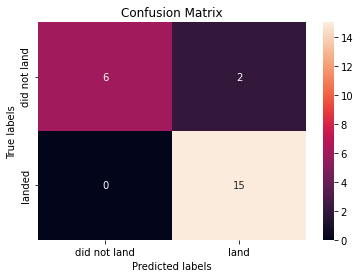

In [141]:
yhat = dt_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **k - Nearest Neighbor**

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [142]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

## Training the KNN Model

In [143]:
knn_clf = GridSearchCV(KNN,parameters,cv=10)
knn_clf.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [144]:
print("tuned hpyerparameters :(best parameters) ",knn_clf.best_params_)
print("accuracy :",knn_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.85


## Testing the KNN Model

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [145]:
KNN_Accuracy=knn_clf.score(X_test, Y_test);
print("test set accuracy :",KNN_Accuracy)

test set accuracy : 0.8695652173913043


## Confusion matrix


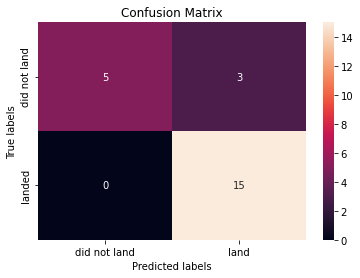

In [146]:
yhat = knn_clf.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# **Performance Analysis**


In [147]:
print('Accuracy for Logistics Regression method:', Logistic_Regression_Accuracy)
print( 'Accuracy for Support Vector Machine method:', SVM_Accuracy)
print('Accuracy for Decision tree method:', DecisionTree_Accuracy)
print('Accuracy for K nearsdt neighbors method:', KNN_Accuracy)

Accuracy for Logistics Regression method: 0.8260869565217391
Accuracy for Support Vector Machine method: 0.8260869565217391
Accuracy for Decision tree method: 0.9130434782608695
Accuracy for K nearsdt neighbors method: 0.8695652173913043


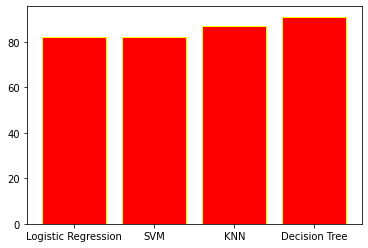

In [181]:
import matplotlib.pyplot as plt
X=["Logistic Regression","SVM","KNN","Decision Tree"]
Y=[82,82,87,91]
plt.bar(X,Y,color="red",edgecolor="Yellow")
plt.show()


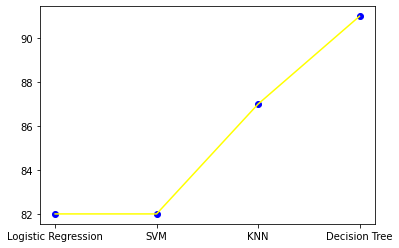

In [187]:
plt.scatter(X,Y,color="blue")
plt.plot(X,Y,color="yellow")
plt.show()